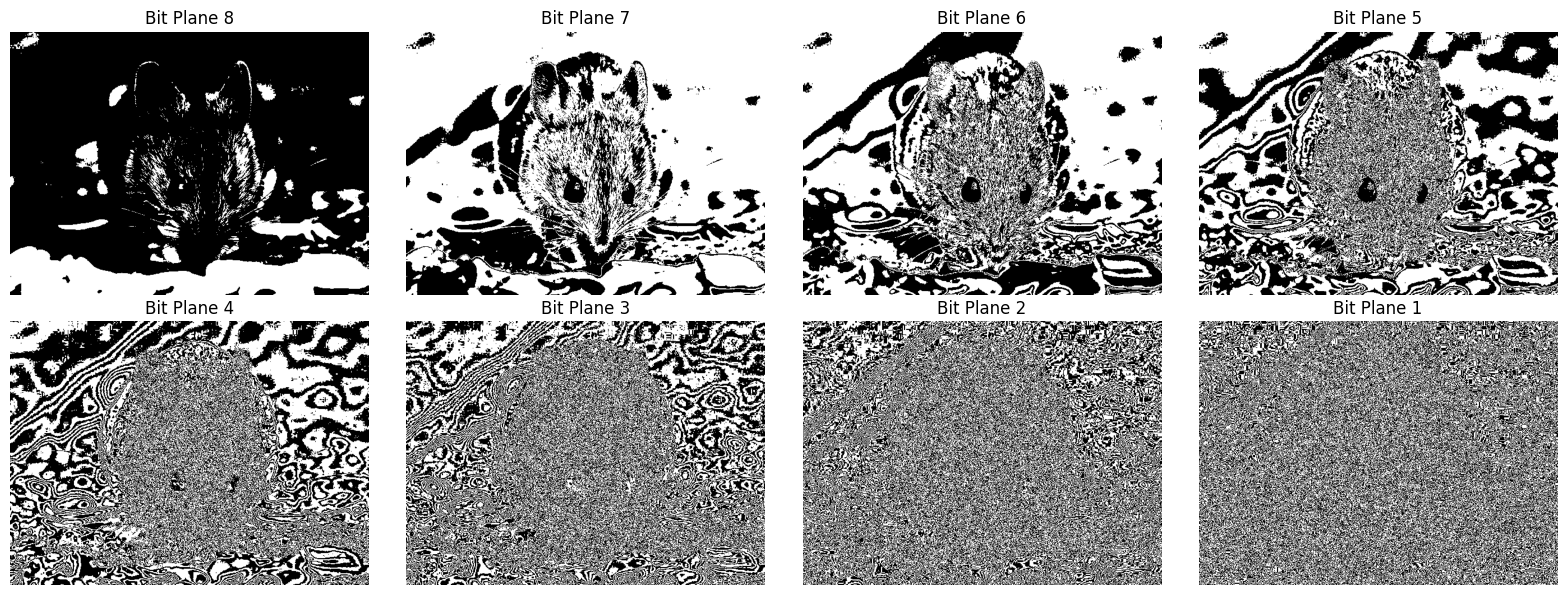

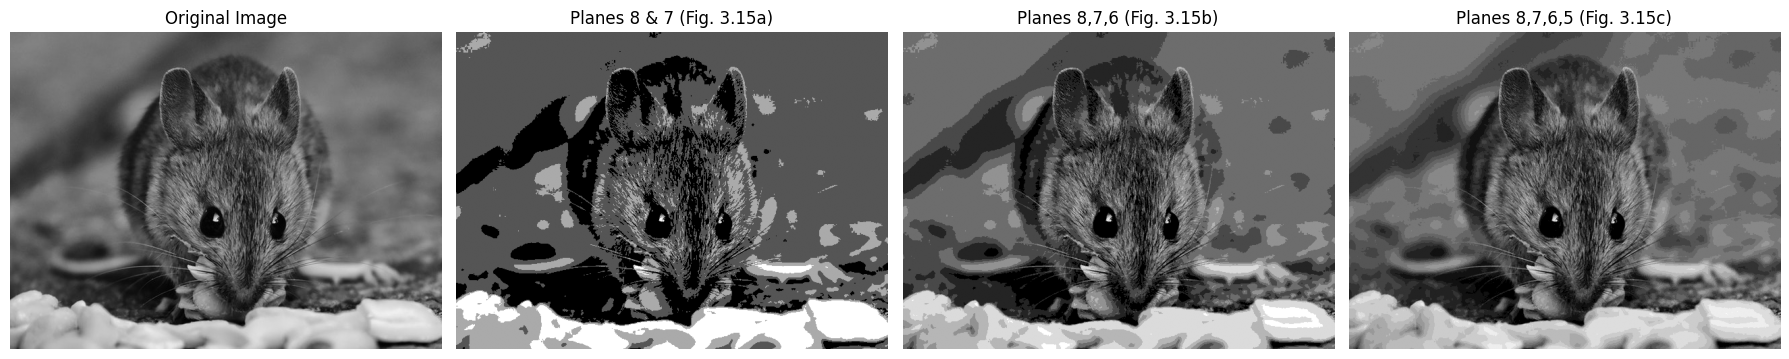

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r'C:\Users\Admin\Desktop\B23AI065_CVIP\mouse.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

bit_planes = []
for i in range(8):
    plane = (image >> i) & 1
    bit_planes.append(plane * 255)

plt.figure(figsize=(16, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(bit_planes[7-i], cmap='gray')
    plt.title(f'Bit Plane {8-i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

def reconstruct_image(selected_planes):
    reconstructed = np.zeros_like(image, dtype=np.uint8)
    for i in selected_planes:
        reconstructed += (bit_planes[i] // 255) * (2**i)
    return reconstructed

recon_8_7 = reconstruct_image([7, 6])
recon_8_7_6 = reconstruct_image([7, 6, 5])
recon_8_7_6_5 = reconstruct_image([7, 6, 5, 4])

plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(recon_8_7, cmap='gray')
plt.title('Planes 8 & 7 (Fig. 3.15a)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(recon_8_7_6, cmap='gray')
plt.title('Planes 8,7,6 (Fig. 3.15b)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(recon_8_7_6_5, cmap='gray')
plt.title('Planes 8,7,6,5 (Fig. 3.15c)')
plt.axis('off')

plt.tight_layout()
plt.show()
